In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

100%|██████████| 9.91M/9.91M [00:06<00:00, 1.42MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 113kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.07MB/s]
100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]


In [3]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),  # 28x28 → 28x28
            nn.ReLU(),
            nn.MaxPool2d(2),                                       # 28x28 → 14x14

            nn.Conv2d(16, 32, kernel_size=3),                      # 14x14 → 12x12
            nn.ReLU(),
            nn.MaxPool2d(2)                                        # 12x12 → 6x6
        )

        # Dynamically compute flattened size
        dummy_input = torch.zeros(1, 1, 28, 28)
        flattened_size = self.conv(dummy_input).view(1, -1).size(1)

        self.fc = nn.Sequential(
            nn.Linear(flattened_size, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)  # flatten
        return self.fc(x)


In [5]:
# Training
def train_model(optimizer_name, model, train_loader, epochs=5):
    criterion = nn.CrossEntropyLoss()

    if optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=0.01)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=0.001)
    elif optimizer_name == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), lr=0.001)
    elif optimizer_name == 'MiniBatchSGD':
        optimizer = optim.SGD(model.parameters(), lr=0.01)
    elif optimizer_name == 'Adagrad':
        optimizer = optim.Adagrad(model.parameters(), lr=0.01)


    model.train()
    accuracy_per_epoch = []

    for epoch in range(epochs):
        correct = 0
        total = 0

        for images, labels in train_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        acc = 100 * correct / total
        accuracy_per_epoch.append(acc)
        print(f'{optimizer_name} | Epoch [{epoch+1}/{epochs}], Accuracy: {acc:.2f}%')

    return accuracy_per_epoch


In [6]:
optimizers = ['SGD', 'Adam', 'RMSprop', 'MiniBatchSGD', 'Adagrad']
results = {}

for opt in optimizers:
    model = SimpleCNN()
    accs = train_model(opt, model, train_loader)
    results[opt] = accs


SGD | Epoch [1/5], Accuracy: 81.34%
SGD | Epoch [2/5], Accuracy: 94.92%
SGD | Epoch [3/5], Accuracy: 96.56%
SGD | Epoch [4/5], Accuracy: 97.28%
SGD | Epoch [5/5], Accuracy: 97.74%
Adam | Epoch [1/5], Accuracy: 94.99%
Adam | Epoch [2/5], Accuracy: 98.36%
Adam | Epoch [3/5], Accuracy: 98.87%
Adam | Epoch [4/5], Accuracy: 99.14%
Adam | Epoch [5/5], Accuracy: 99.28%
RMSprop | Epoch [1/5], Accuracy: 95.61%
RMSprop | Epoch [2/5], Accuracy: 98.53%
RMSprop | Epoch [3/5], Accuracy: 98.95%
RMSprop | Epoch [4/5], Accuracy: 99.21%
RMSprop | Epoch [5/5], Accuracy: 99.41%
MiniBatchSGD | Epoch [1/5], Accuracy: 83.00%
MiniBatchSGD | Epoch [2/5], Accuracy: 94.91%
MiniBatchSGD | Epoch [3/5], Accuracy: 96.49%
MiniBatchSGD | Epoch [4/5], Accuracy: 97.33%
MiniBatchSGD | Epoch [5/5], Accuracy: 97.69%
Adagrad | Epoch [1/5], Accuracy: 96.31%
Adagrad | Epoch [2/5], Accuracy: 98.53%
Adagrad | Epoch [3/5], Accuracy: 98.83%
Adagrad | Epoch [4/5], Accuracy: 99.08%
Adagrad | Epoch [5/5], Accuracy: 99.22%


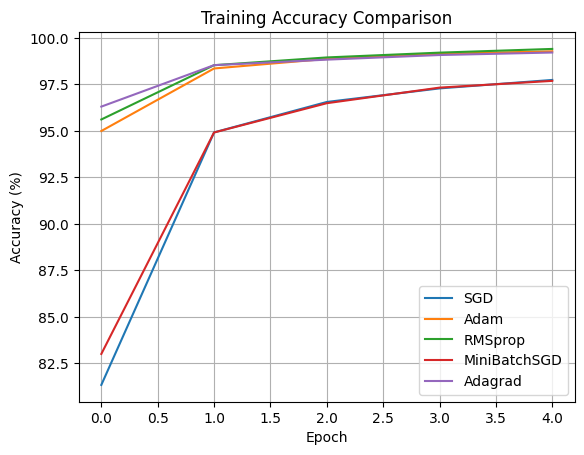

In [7]:
# Plot
for opt in optimizers:
    plt.plot(results[opt], label=opt)

plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()